In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import _pickle as cPickle
import gzip
import joblib
import os

In [2]:
train = pd.read_csv("train.csv", nrows = 4000000)
test = pd.read_csv("train.csv", nrows = 40000)

/Users/jeet/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.drop(train.columns[[2,3,4,5,6,7,8,9,10,11,13,17,20]], axis=1, inplace=True)
train.rename(columns={'Trip ID' : 'key','Trip Total' : 'fare_amount','Pickup Centroid Latitude' : 'pickup_latitude',
                         'Pickup Centroid Longitude' : 'pickup_longitude','Dropoff Centroid Latitude' : 'dropoff_latitude',
                         'Dropoff Centroid Longitude' : 'dropoff_longitude','Trip Start Timestamp' : 'trip_start_timestamp',
                         'Trip Start Timestamp' : 'pickup_datetime','Trip End Timestamp' : 'dropoff_datetime',
                         'Trips Pooled' : 'passenger_count'},inplace=True)



test.drop(test.columns[[2,3,4,5,6,7,8,9,10,11,13,17,20]], axis=1, inplace=True)
test.rename(columns={'Trip ID' : 'key','Trip Total' : 'fare_amount','Pickup Centroid Latitude' : 'pickup_latitude',
                         'Pickup Centroid Longitude' : 'pickup_longitude','Dropoff Centroid Latitude' : 'dropoff_latitude',
                         'Dropoff Centroid Longitude' : 'dropoff_longitude','Trip Start Timestamp' : 'trip_start_timestamp',
                         'Trip Start Timestamp' : 'pickup_datetime','Trip End Timestamp' : 'dropoff_datetime',
                         'Trips Pooled' : 'passenger_count'},inplace=True)


In [4]:
test.tail()

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
39995,9c23ab7cf409ff0d8df9ff613aab0a7a868ace8d,06/09/2019 06:00:00 PM,12.55,1,41.906026,-87.675312,41.942585,-87.656644
39996,9c23ac1015dda32b3728182b2566ea1e561febc0,04/02/2019 10:45:00 AM,5.05,1,41.841691,-87.612564,41.834962,-87.625154
39997,9c23ac508c286ea916264c9ae93995755d5ed77c,05/25/2019 10:00:00 AM,12.55,1,41.859350,-87.617358,41.884987,-87.620993
39998,9c23ad425616311da227e45e72bc9d34b5a7fdb9,05/18/2019 11:30:00 AM,15.05,1,41.879255,-87.642649,41.934659,-87.646730
39999,9c23adc75d585f7fe50d0a6144bfaf2ce910c2a5,05/24/2019 04:15:00 PM,52.55,1,41.979071,-87.903040,41.884987,-87.620993


In [5]:
train.shape

(1687711, 8)

In [6]:
test.shape

(40000, 8)

In [7]:
train.head(10)

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,9bc7855bab1aeeb12d18119e96560419a3cd0666,04/27/2019 11:15:00 PM,12.55,1.0,41.885281,-87.657233,41.892073,-87.628874
1,9bc7857ca7c4d59d9ebcf2045ce606bb328955bc,04/05/2019 10:15:00 PM,10.05,2.0,41.878667,-87.671654,41.879067,-87.657005
2,9bc7859db500eb3f4bd49b7922bc98439902be7e,04/18/2019 04:30:00 PM,35.56,1.0,41.785999,-87.750934,41.914586,-87.645966
3,9bc785c7f11421b6095c3b87584e6d33298f6a45,05/14/2019 08:00:00 PM,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502
4,9bc785dd5329be87e910da364f1f766a762cb854,05/18/2019 07:15:00 PM,12.55,1.0,41.929273,-87.673807,41.935058,-87.737620
5,9bc78761e6c77760c8e975487ec073d3ab6a3fcb,04/22/2019 08:30:00 AM,10.27,1.0,41.890609,-87.756047,41.890609,-87.756047
6,9bc78771e6e74bf13a791ae4061ae1abdd97b723,05/21/2019 08:30:00 PM,7.55,4.0,41.809018,-87.659167,41.829922,-87.672503
7,9bc788427860c8b7b5cd3e605c013b2ee55b0cc4,06/23/2019 01:15:00 AM,32.55,1.0,41.921085,-87.704648,NaN,NaN
8,9bc7896754f084c75a42a4bad90a020659fdf249,06/19/2019 12:30:00 PM,29.05,1.0,NaN,NaN,41.878866,-87.625192
9,9bc7899bf17dbfb94ed15436cfca73be19a8a89a,04/26/2019 10:15:00 PM,7.72,1.0,41.890609,-87.756047,41.890609,-87.756047


In [8]:
train.describe()

,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.687710e+06,1.687710e+06,1.585223e+06,1.585223e+06,1.572848e+06,1.572848e+06
mean,1.609268e+01,1.290612e+00,4.189230e+01,-8.766675e+01,4.189305e+01,-8.766867e+01
std,1.256417e+01,8.029132e-01,6.113821e-02,6.303895e-02,6.112746e-02,6.696198e-02
min,0.000000e+00,1.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01
25%,7.550000e+00,1.000000e+00,4.187741e+01,-8.767995e+01,4.187741e+01,-8.768199e+01
50%,1.255000e+01,1.000000e+00,4.189322e+01,-8.765156e+01,4.189322e+01,-8.765156e+01
75%,1.805000e+01,1.000000e+00,4.192908e+01,-8.763141e+01,4.192933e+01,-8.763141e+01
max,5.133500e+02,1.600000e+01,4.202122e+01,-8.752995e+01,4.202122e+01,-8.753071e+01


In [9]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

dropoff_longitude    114863
dropoff_latitude     114863
pickup_longitude     102488
pickup_latitude      102488
passenger_count           1
fare_amount               1
pickup_datetime           0
key                       0
dtype: int64

In [10]:
#check for missing values in test data
test.isnull().sum().sort_values(ascending=False)

dropoff_longitude    2720
dropoff_latitude     2720
pickup_longitude     2317
pickup_latitude      2317
passenger_count         0
fare_amount             0
pickup_datetime         0
key                     0
dtype: int64

In [11]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [12]:
train.shape

(1470569, 8)

In [13]:
#check the target column
train['fare_amount'].describe()

count    1.470569e+06
mean     1.421225e+01
std      1.014430e+01
min      0.000000e+00
25%      7.550000e+00
50%      1.105000e+01
75%      1.605000e+01
max      3.141000e+02
Name: fare_amount, dtype: float64

Fare amount has a negative value, which doesn't make sense. Remove these fields

In [14]:
#38 fields have negative fare_amount values.
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 1470569})

In [15]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(1470569, 8)

In [16]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    1.470569e+06
mean     1.421225e+01
std      1.014430e+01
min      0.000000e+00
25%      7.550000e+00
50%      1.105000e+01
75%      1.605000e+01
max      3.141000e+02
Name: fare_amount, dtype: float64

In [17]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False)

1455248    314.10
876740     235.40
1222316    227.93
1363477    222.43
593129     210.46
            ...  
27775        0.00
718481       0.00
1616939      0.00
620182       0.00
1600082      0.00
Name: fare_amount, Length: 1470569, dtype: float64

Next check the passenger_count variable

In [18]:
train['passenger_count'].describe()

count    1.470569e+06
mean     1.299408e+00
std      8.186442e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.600000e+01
Name: passenger_count, dtype: float64

In [19]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#LOL! One field. this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
266,9bc829b5908fc6d589c28bd4fe22ae19ecdfcfb3,05/28/2019 05:30:00 PM,10.05,8.0,41.874005,-87.663518,41.922761,-87.699155
417,9bc8861d24d73d84183e476e7345e600a0a57527,05/04/2019 03:15:00 PM,5.05,7.0,42.009623,-87.670167,42.001571,-87.695013
583,9bc8e99457112e6508cb64b5e7a0c26ca9242195,06/04/2019 04:30:00 PM,10.05,7.0,41.885300,-87.642808,41.899156,-87.626211
1225,9bca66bfa38da7585f9de54784bb813ffbe75e5a,05/12/2019 10:15:00 AM,12.55,7.0,41.880994,-87.632746,41.836510,-87.653159
1408,9bcad9405a3f323c077e56305b7945329047d49c,05/11/2019 03:45:00 PM,12.55,7.0,41.936237,-87.656412,41.885300,-87.642808
...,...,...,...,...,...,...,...,...
1685913,ab0e2b909a6df5b67e44d04339708108f95334b9,04/07/2019 01:45:00 PM,7.59,7.0,41.911857,-87.710087,41.885281,-87.657233
1686031,ab0e621b9e0461e9b5489b21541287460638c5a3,04/12/2019 01:30:00 PM,2.55,8.0,41.849247,-87.624135,41.870607,-87.622173
1686490,ab0f688173dce73603d8c5443304e09f6c9d3508,04/10/2019 05:30:00 PM,5.05,7.0,41.938232,-87.646782,41.963374,-87.670185
1687572,ab120dcfb9c50536c605b99351416f8c6b3fd0bf,05/13/2019 06:30:00 AM,3.55,7.0,41.899156,-87.626211,41.914616,-87.631717


In [20]:
train = train.drop(train[train['passenger_count']>6].index, axis = 0)

In [21]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe()

count    1.466917e+06
mean     1.283355e+00
std      7.515005e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [22]:
train['key'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
train['pickup_datetime']

0         2019-04-27 23:15:00
1         2019-04-05 22:15:00
2         2019-04-18 16:30:00
3         2019-05-14 20:00:00
4         2019-05-18 19:15:00
                  ...        
1687705   2019-04-25 11:30:00
1687706   2019-06-17 20:30:00
1687707   2019-06-20 22:15:00
1687708   2019-05-30 13:30:00
1687709   2019-04-13 07:15:00
Name: pickup_datetime, Length: 1466917, dtype: datetime64[ns]

In [23]:
#Convert for test data
test['key'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])
test['pickup_datetime']

0       2019-04-27 23:15:00
1       2019-04-05 22:15:00
2       2019-04-18 16:30:00
3       2019-05-14 20:00:00
4       2019-05-18 19:15:00
                ...        
39995   2019-06-09 18:00:00
39996   2019-04-02 10:45:00
39997   2019-05-25 10:00:00
39998   2019-05-18 11:30:00
39999   2019-05-24 16:15:00
Name: pickup_datetime, Length: 40000, dtype: datetime64[ns]

In [24]:
#check the dtypes after conversion
train.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
fare_amount                 float64
passenger_count             float64
pickup_latitude             float64
pickup_longitude            float64
dropoff_latitude            float64
dropoff_longitude           float64
dtype: object

In [25]:
test.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
fare_amount                 float64
passenger_count               int64
pickup_latitude             float64
pickup_longitude            float64
dropoff_latitude            float64
dropoff_longitude           float64
dtype: object

In [26]:
#check the train data
train.head()

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2019-04-27 23:15:00,2019-04-27 23:15:00,12.55,1.0,41.885281,-87.657233,41.892073,-87.628874
1,2019-04-05 22:15:00,2019-04-05 22:15:00,10.05,2.0,41.878667,-87.671654,41.879067,-87.657005
2,2019-04-18 16:30:00,2019-04-18 16:30:00,35.56,1.0,41.785999,-87.750934,41.914586,-87.645966
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502
4,2019-05-18 19:15:00,2019-05-18 19:15:00,12.55,1.0,41.929273,-87.673807,41.935058,-87.737620


In [27]:
#check the test data
test.head()

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2019-04-27 23:15:00,2019-04-27 23:15:00,12.55,1,41.885281,-87.657233,41.892073,-87.628874
1,2019-04-05 22:15:00,2019-04-05 22:15:00,10.05,2,41.878667,-87.671654,41.879067,-87.657005
2,2019-04-18 16:30:00,2019-04-18 16:30:00,35.56,1,41.785999,-87.750934,41.914586,-87.645966
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1,41.927261,-87.765502,41.927261,-87.765502
4,2019-05-18 19:15:00,2019-05-18 19:15:00,12.55,1,41.929273,-87.673807,41.935058,-87.737620


Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

In [28]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        #R = 6371  #radius of earth in kilometers
        R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in miles
        i['H_Distance'] = d
    return d

In [29]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0         1.532388
1         0.754134
2        10.398737
3         0.000000
4         3.304516
           ...    
39995     2.702312
39996     0.797657
39997     1.781333
39998     3.834035
39999    15.889188
Length: 40000, dtype: float64

In [30]:
train['H_Distance'].head(10)

0      1.532388
1      0.754134
2     10.398737
3      0.000000
4      3.304516
5      0.000000
6      1.599362
9      0.000000
10     1.654426
11     0.988232
Name: H_Distance, dtype: float64

In [31]:
test['H_Distance'].head(10)

0     1.532388
1     0.754134
2    10.398737
3     0.000000
4     3.304516
5     0.000000
6     1.599362
7          NaN
8          NaN
9     0.000000
Name: H_Distance, dtype: float64

In [32]:
train.head(10)

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance
0,2019-04-27 23:15:00,2019-04-27 23:15:00,12.55,1.0,41.885281,-87.657233,41.892073,-87.628874,1.532388
1,2019-04-05 22:15:00,2019-04-05 22:15:00,10.05,2.0,41.878667,-87.671654,41.879067,-87.657005,0.754134
2,2019-04-18 16:30:00,2019-04-18 16:30:00,35.56,1.0,41.785999,-87.750934,41.914586,-87.645966,10.398737
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502,0.000000
4,2019-05-18 19:15:00,2019-05-18 19:15:00,12.55,1.0,41.929273,-87.673807,41.935058,-87.737620,3.304516
5,2019-04-22 08:30:00,2019-04-22 08:30:00,10.27,1.0,41.890609,-87.756047,41.890609,-87.756047,0.000000
6,2019-05-21 20:30:00,2019-05-21 20:30:00,7.55,4.0,41.809018,-87.659167,41.829922,-87.672503,1.599362
9,2019-04-26 22:15:00,2019-04-26 22:15:00,7.72,1.0,41.890609,-87.756047,41.890609,-87.756047,0.000000
10,2019-06-15 17:45:00,2019-06-15 17:45:00,5.05,3.0,41.885281,-87.657233,41.871016,-87.631407,1.654426
11,2019-06-13 19:30:00,2019-06-13 19:30:00,9.55,1.0,41.892508,-87.626215,41.885300,-87.642808,0.988232


In [33]:
test.tail(10)

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance
39990,2019-05-05 17:00:00,2019-05-05 17:00:00,10.05,1,41.912364,-87.675063,41.907413,-87.640902,1.789653
39991,2019-06-14 11:45:00,2019-06-14 11:45:00,21.05,1,41.938666,-87.711211,41.874005,-87.663518,5.096813
39992,2019-05-21 06:15:00,2019-05-21 06:15:00,15.55,1,41.985015,-87.804532,NaN,NaN,NaN
39993,2019-05-16 12:30:00,2019-05-16 12:30:00,7.50,1,41.900070,-87.720918,41.900070,-87.720918,0.000000
39994,2019-06-08 08:00:00,2019-06-08 08:00:00,25.35,1,41.859350,-87.617358,41.859350,-87.617358,0.000000
39995,2019-06-09 18:00:00,2019-06-09 18:00:00,12.55,1,41.906026,-87.675312,41.942585,-87.656644,2.702312
39996,2019-04-02 10:45:00,2019-04-02 10:45:00,5.05,1,41.841691,-87.612564,41.834962,-87.625154,0.797657
39997,2019-05-25 10:00:00,2019-05-25 10:00:00,12.55,1,41.859350,-87.617358,41.884987,-87.620993,1.781333
39998,2019-05-18 11:30:00,2019-05-18 11:30:00,15.05,1,41.879255,-87.642649,41.934659,-87.646730,3.834035
39999,2019-05-24 16:15:00,2019-05-24 16:15:00,52.55,1,41.979071,-87.903040,41.884987,-87.620993,15.889188


Now that we have calculated the distance, we shall create columns for the following - 
* year
* month
* date
* hour
* day of week

In [34]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [35]:
train.head()

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
0,2019-04-27 23:15:00,2019-04-27 23:15:00,12.55,1.0,41.885281,-87.657233,41.892073,-87.628874,1.532388,2019,4,27,5,23
1,2019-04-05 22:15:00,2019-04-05 22:15:00,10.05,2.0,41.878667,-87.671654,41.879067,-87.657005,0.754134,2019,4,5,4,22
2,2019-04-18 16:30:00,2019-04-18 16:30:00,35.56,1.0,41.785999,-87.750934,41.914586,-87.645966,10.398737,2019,4,18,3,16
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502,0.000000,2019,5,14,1,20
4,2019-05-18 19:15:00,2019-05-18 19:15:00,12.55,1.0,41.929273,-87.673807,41.935058,-87.737620,3.304516,2019,5,18,5,19


In [36]:
test.head()

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
0,2019-04-27 23:15:00,2019-04-27 23:15:00,12.55,1,41.885281,-87.657233,41.892073,-87.628874,1.532388,2019,4,27,5,23
1,2019-04-05 22:15:00,2019-04-05 22:15:00,10.05,2,41.878667,-87.671654,41.879067,-87.657005,0.754134,2019,4,5,4,22
2,2019-04-18 16:30:00,2019-04-18 16:30:00,35.56,1,41.785999,-87.750934,41.914586,-87.645966,10.398737,2019,4,18,3,16
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1,41.927261,-87.765502,41.927261,-87.765502,0.000000,2019,5,14,1,20
4,2019-05-18 19:15:00,2019-05-18 19:15:00,12.55,1,41.929273,-87.673807,41.935058,-87.737620,3.304516,2019,5,18,5,19


**1. Does the number of passengers affect the fare? **

Text(0, 0.5, 'Frequency')

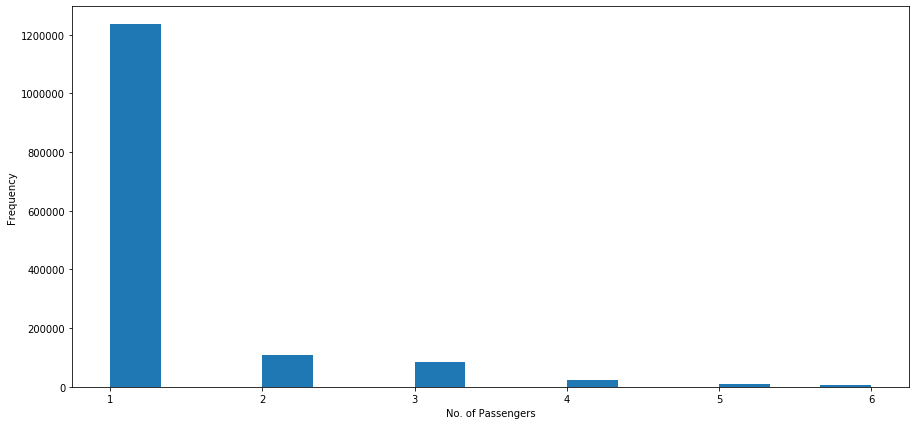

In [37]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

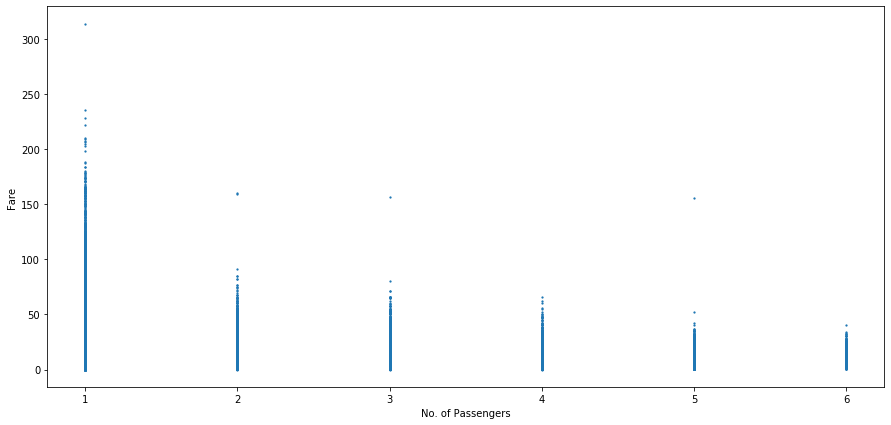

In [38]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**2. Does the date and time of pickup affect the fare?**

Text(0, 0.5, 'Fare')

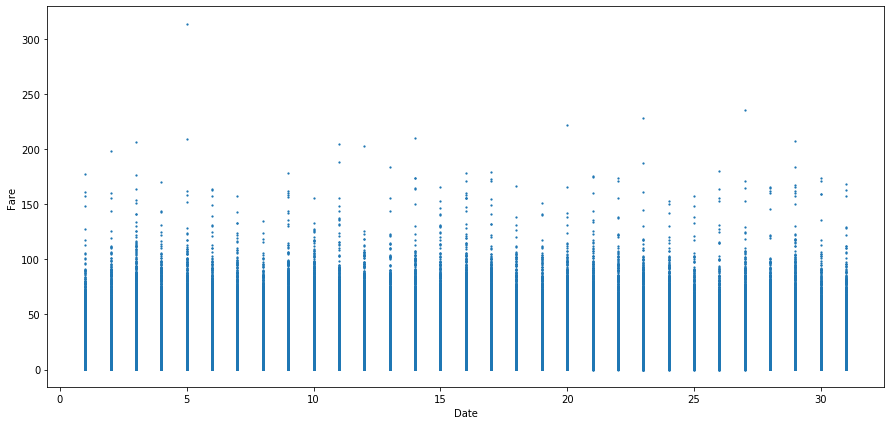

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

Text(0, 0.5, 'Frequency')

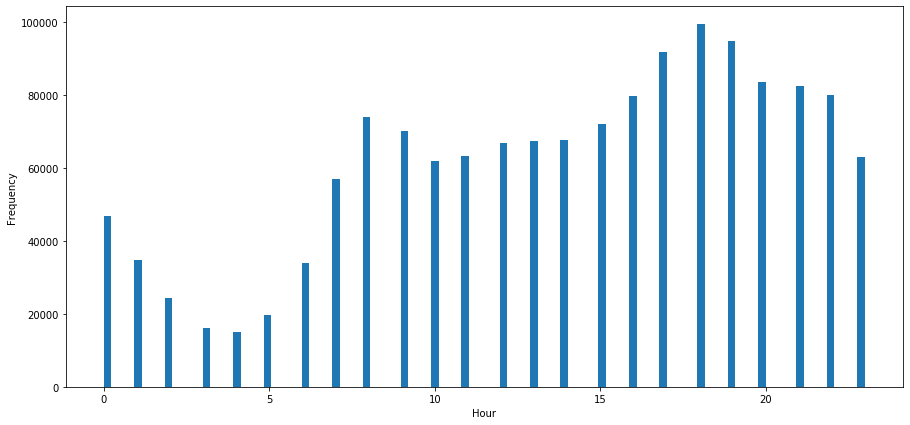

In [40]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0, 0.5, 'Fare')

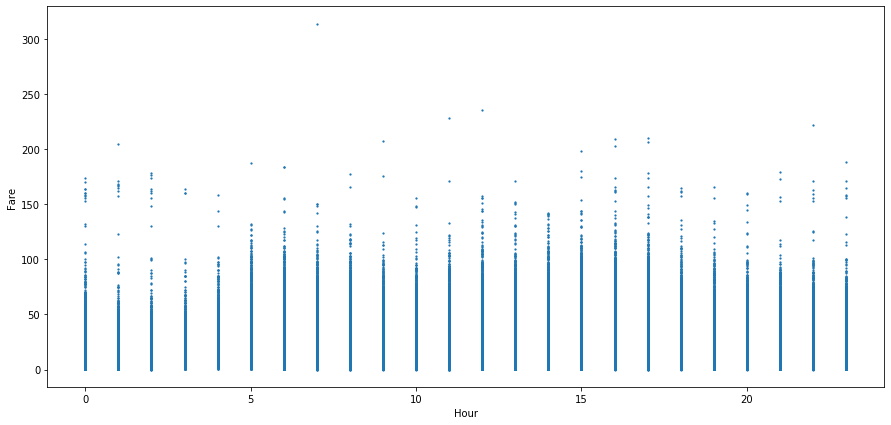

In [41]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?  

**3. Does the day of the week affect the fare?**

Text(0, 0.5, 'Frequency')

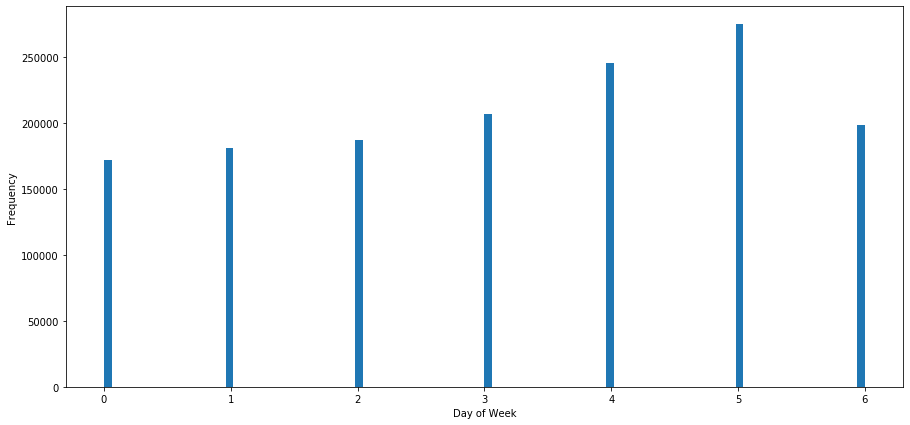

In [42]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Nah, day of the week doesn't seem to have that much of an influence on the number of cab rides

Text(0, 0.5, 'Fare')

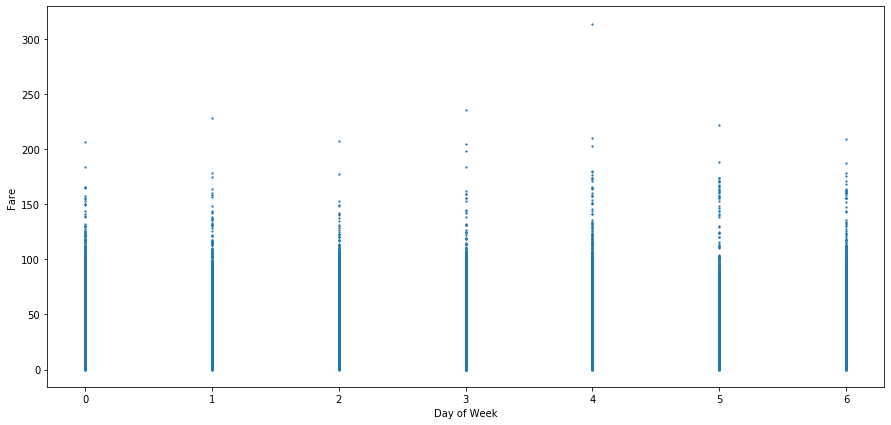

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work, or grab a drink from close by. Hmmm..

**4. Does the distance affect the fare?**

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [44]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
709594,2019-05-07 12:30:00,2019-05-07 12:30:00,68.05,1.0,41.980264,-87.913625,41.663671,-87.540936,29.100485,2019,5,7,1,12
852642,2019-05-14 11:00:00,2019-05-14 11:00:00,64.05,1.0,41.663671,-87.540936,41.980264,-87.913625,29.100485,2019,5,14,1,11
356131,2019-05-02 03:45:00,2019-05-02 03:45:00,60.05,1.0,41.663671,-87.540936,41.980264,-87.913625,29.100485,2019,5,2,3,3
357317,2019-04-05 09:45:00,2019-04-05 09:45:00,58.54,1.0,41.663671,-87.540936,41.980264,-87.913625,29.100485,2019,4,5,4,9
926571,2019-05-08 05:45:00,2019-05-08 05:45:00,55.05,1.0,41.980264,-87.913625,41.663671,-87.540936,29.100485,2019,5,8,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526798,2019-04-24 14:15:00,2019-04-24 14:15:00,0.72,1.0,41.867902,-87.642959,41.867902,-87.642959,0.000000,2019,4,24,2,14
1535746,2019-06-24 23:00:00,2019-06-24 23:00:00,0.72,2.0,41.938391,-87.638575,41.938391,-87.638575,0.000000,2019,6,24,0,23
1610141,2019-04-09 07:15:00,2019-04-09 07:15:00,0.72,2.0,41.899602,-87.633308,41.899602,-87.633308,0.000000,2019,4,9,1,7
1654278,2019-06-19 14:00:00,2019-06-19 14:00:00,0.72,1.0,41.880994,-87.632746,41.880994,-87.632746,0.000000,2019,6,19,2,14


In [45]:
len(train)

1466917

In [46]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour


In [47]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [48]:
#1 row dropped
train.shape

(1466917, 14)

In [49]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]
#No records! PHEW!

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour


In [50]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour


In [51]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [52]:
#3 rows dropped
train.shape

(1466917, 14)

In [53]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour


Check the H_Distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB!

In [54]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [55]:
high_distance

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour


In [56]:
high_distance.shape

(0, 14)

In [57]:
#high_distance['H_Distance'] = high_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56,axis=1)

In [58]:
#The distance values have been replaced by the newly calculated ones according to the fare
#high_distance

In [59]:
#sync the train data with the newly computed distance values from high_distance dataframe
#train.update(high_distance)

In [60]:
#train.shape

Now we shall check for rows where the distance values are 0

In [61]:
train[train['H_Distance']==0]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502,0.0,2019,5,14,1,20
5,2019-04-22 08:30:00,2019-04-22 08:30:00,10.27,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,4,22,0,8
9,2019-04-26 22:15:00,2019-04-26 22:15:00,7.72,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,4,26,4,22
21,2019-06-19 11:00:00,2019-06-19 11:00:00,7.55,1.0,41.744200,-87.586348,41.744200,-87.586348,0.0,2019,6,19,2,11
29,2019-04-18 08:45:00,2019-04-18 08:45:00,5.10,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,4,18,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687587,2019-04-07 08:45:00,2019-04-07 08:45:00,5.05,1.0,41.944227,-87.655998,41.944227,-87.655998,0.0,2019,4,7,6,8
1687632,2019-04-14 18:15:00,2019-04-14 18:15:00,9.55,1.0,41.954028,-87.763399,41.954028,-87.763399,0.0,2019,4,14,6,18
1687658,2019-06-19 12:45:00,2019-06-19 12:45:00,42.55,1.0,41.859350,-87.617358,41.859350,-87.617358,0.0,2019,6,19,2,12
1687667,2019-06-17 10:45:00,2019-06-17 10:45:00,7.50,1.0,41.900070,-87.720918,41.900070,-87.720918,0.0,2019,6,17,0,10


In [62]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
1056744,2019-05-27 17:30:00,2019-05-27 17:30:00,0.0,1.0,41.817366,-87.698861,41.817366,-87.698861,0.0,2019,5,27,0,17


There are 4 rows. There 4 rows do not help us in anyway as we do not know either the distance or the fare to impute the missing values. So we shall drop them 

In [63]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [64]:
#4 rows dropped
train[(train['H_Distance']==0)].shape

(57737, 14)

In [65]:
#Between 8AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=8)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.25))]
rush_hour

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
343,2019-05-02 12:15:00,2019-05-02 12:15:00,2.55,3.0,41.986712,-87.663416,41.986712,-87.663416,0.0,2019,5,2,3,12
593,2019-06-06 20:45:00,2019-06-06 20:45:00,2.55,2.0,41.859350,-87.617358,41.859350,-87.617358,0.0,2019,6,6,3,20
1752,2019-05-15 19:00:00,2019-05-15 19:00:00,2.55,3.0,41.812949,-87.617860,41.812949,-87.617860,0.0,2019,5,15,2,19
2075,2019-05-24 14:45:00,2019-05-24 14:45:00,2.55,3.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,5,24,4,14
3627,2019-06-19 11:30:00,2019-06-19 11:30:00,2.55,2.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,6,19,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685675,2019-05-07 12:45:00,2019-05-07 12:45:00,2.55,2.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,5,7,1,12
1685779,2019-05-29 16:15:00,2019-05-29 16:15:00,2.55,3.0,41.880994,-87.632746,41.880994,-87.632746,0.0,2019,5,29,2,16
1686760,2019-06-18 19:30:00,2019-06-18 19:30:00,2.55,3.0,41.968069,-87.721559,41.968069,-87.721559,0.0,2019,6,18,1,19
1687029,2019-05-21 10:15:00,2019-05-21 10:15:00,2.55,2.0,41.839087,-87.714004,41.839087,-87.714004,0.0,2019,5,21,1,10


In [66]:
train=train.drop(rush_hour.index, axis=0)

In [67]:
train.shape

(1465984, 14)

In [68]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<8)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.75))]
non_rush_hour

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
282,2019-05-14 07:15:00,2019-05-14 07:15:00,2.55,3.0,41.808916,-87.596183,41.808916,-87.596183,0.0,2019,5,14,1,7
1058,2019-06-13 04:30:00,2019-06-13 04:30:00,2.55,2.0,41.938666,-87.711211,41.938666,-87.711211,0.0,2019,6,13,3,4
1172,2019-06-01 21:30:00,2019-06-01 21:30:00,2.85,3.0,41.860190,-87.717220,41.860190,-87.717220,0.0,2019,6,1,5,21
1254,2019-04-11 21:00:00,2019-04-11 21:00:00,2.55,3.0,41.927415,-87.780461,41.927415,-87.780461,0.0,2019,4,11,3,21
3697,2019-05-22 23:15:00,2019-05-22 23:15:00,2.55,2.0,41.900070,-87.720918,41.900070,-87.720918,0.0,2019,5,22,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682599,2019-05-03 21:45:00,2019-05-03 21:45:00,2.55,2.0,41.927853,-87.735626,41.927853,-87.735626,0.0,2019,5,3,4,21
1684500,2019-04-20 01:00:00,2019-04-20 01:00:00,2.55,2.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,4,20,5,1
1685016,2019-04-18 04:00:00,2019-04-18 04:00:00,2.55,3.0,41.740206,-87.615970,41.740206,-87.615970,0.0,2019,4,18,3,4
1686419,2019-05-23 21:45:00,2019-05-23 21:45:00,2.55,4.0,42.001571,-87.695013,42.001571,-87.695013,0.0,2019,5,23,3,21


In [69]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.5)]
weekends

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
3822,2019-05-12 20:45:00,2019-05-12 20:45:00,2.55,2.0,41.839087,-87.714004,41.839087,-87.714004,0.0,2019,5,12,6,20
4096,2019-06-16 10:30:00,2019-06-16 10:30:00,3.22,1.0,41.922761,-87.699155,41.922761,-87.699155,0.0,2019,6,16,6,10
9906,2019-06-10 21:30:00,2019-06-10 21:30:00,2.55,2.0,41.848180,-87.702699,41.848180,-87.702699,0.0,2019,6,10,0,21
10210,2019-04-14 19:45:00,2019-04-14 19:45:00,2.55,3.0,41.761578,-87.572782,41.761578,-87.572782,0.0,2019,4,14,6,19
10419,2019-05-27 18:15:00,2019-05-27 18:15:00,2.55,3.0,41.880994,-87.632746,41.880994,-87.632746,0.0,2019,5,27,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678970,2019-04-28 20:00:00,2019-04-28 20:00:00,2.55,3.0,41.761578,-87.572782,41.761578,-87.572782,0.0,2019,4,28,6,20
1679476,2019-06-02 16:15:00,2019-06-02 16:15:00,2.55,3.0,41.871016,-87.631407,41.871016,-87.631407,0.0,2019,6,2,6,16
1681551,2019-05-19 22:15:00,2019-05-19 22:15:00,2.55,2.0,41.874005,-87.663518,41.874005,-87.663518,0.0,2019,5,19,6,22
1683826,2019-05-06 20:30:00,2019-05-06 20:30:00,2.55,2.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019,5,6,0,20


In [70]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
27775,2019-05-22 08:00:00,2019-05-22 08:00:00,0.0,1.0,41.979855,-87.694096,41.966834,-87.684018,1.038045,2019,5,22,2,8
256144,2019-05-27 02:15:00,2019-05-27 02:15:00,0.0,4.0,41.915496,-87.710196,41.904935,-87.649907,3.184871,2019,5,27,0,2
313573,2019-05-23 17:30:00,2019-05-23 17:30:00,0.0,2.0,41.740206,-87.615970,41.761578,-87.572782,2.671578,2019,5,23,3,17
321461,2019-05-26 11:15:00,2019-05-26 11:15:00,0.0,1.0,41.946490,-87.647114,41.905858,-87.630865,2.929203,2019,5,26,6,11
620182,2019-05-23 22:15:00,2019-05-23 22:15:00,0.0,1.0,41.880994,-87.632746,41.905858,-87.630865,1.720717,2019,5,23,3,22
677751,2019-05-23 09:00:00,2019-05-23 09:00:00,0.0,1.0,41.949221,-87.651970,41.979071,-87.903040,13.063395,2019,5,23,3,9
718481,2019-05-21 07:00:00,2019-05-21 07:00:00,0.0,1.0,41.906026,-87.675312,41.880994,-87.632746,2.790132,2019,5,21,1,7
880368,2019-05-24 20:15:00,2019-05-24 20:15:00,0.0,1.0,41.859350,-87.617358,41.797965,-87.589607,4.475718,2019,5,24,4,20
903321,2019-05-21 07:45:00,2019-05-21 07:45:00,0.0,1.0,41.870607,-87.622173,41.893216,-87.637844,1.757986,2019,5,21,1,7
964380,2019-05-23 08:30:00,2019-05-23 08:30:00,0.0,1.0,41.892433,-87.669624,41.880994,-87.632746,2.055077,2019,5,23,3,8


In [71]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [72]:
len(scenario_3)

16

In [73]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
677751,2019-05-23 09:00:00,2019-05-23 09:00:00,0.0,1.0,41.949221,-87.651970,41.979071,-87.903040,13.063395,2019,5,23,3,9
880368,2019-05-24 20:15:00,2019-05-24 20:15:00,0.0,1.0,41.859350,-87.617358,41.797965,-87.589607,4.475718,2019,5,24,4,20
1058252,2019-05-26 02:00:00,2019-05-26 02:00:00,0.0,1.0,42.001698,-87.673574,41.946490,-87.647114,4.049705,2019,5,26,6,2
1600082,2019-05-24 11:15:00,2019-05-24 11:15:00,0.0,3.0,41.816178,-87.675102,41.863118,-87.672920,3.245391,2019,5,24,4,11
256144,2019-05-27 02:15:00,2019-05-27 02:15:00,0.0,4.0,41.915496,-87.710196,41.904935,-87.649907,3.184871,2019,5,27,0,2
321461,2019-05-26 11:15:00,2019-05-26 11:15:00,0.0,1.0,41.946490,-87.647114,41.905858,-87.630865,2.929203,2019,5,26,6,11
718481,2019-05-21 07:00:00,2019-05-21 07:00:00,0.0,1.0,41.906026,-87.675312,41.880994,-87.632746,2.790132,2019,5,21,1,7
313573,2019-05-23 17:30:00,2019-05-23 17:30:00,0.0,2.0,41.740206,-87.615970,41.761578,-87.572782,2.671578,2019,5,23,3,17
1489126,2019-05-25 16:00:00,2019-05-25 16:00:00,0.0,1.0,41.877406,-87.621972,41.886006,-87.671874,2.635089,2019,5,25,5,16
964380,2019-05-23 08:30:00,2019-05-23 08:30:00,0.0,1.0,41.892433,-87.669624,41.880994,-87.632746,2.055077,2019,5,23,3,8


In [74]:
#scenario_3['fare_amount'] = scenario_3.apply(lambda row: ((row['H_Distance'] * 1.80) + 3.25), axis=1)

In [75]:
scenario_3['fare_amount']

27775      0.0
256144     0.0
313573     0.0
321461     0.0
620182     0.0
677751     0.0
718481     0.0
880368     0.0
903321     0.0
964380     0.0
1058252    0.0
1406691    0.0
1489126    0.0
1500710    0.0
1600082    0.0
1616939    0.0
Name: fare_amount, dtype: float64

In [76]:
train.update(scenario_3)

In [77]:
train.shape

(1465984, 14)

**SCENARIO 4**

Fare is  not 0, but Distance is 0. These values need to be imputed.

In [78]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502,0.0,2019.0,5.0,14.0,1.0,20.0
5,2019-04-22 08:30:00,2019-04-22 08:30:00,10.27,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,22.0,0.0,8.0
9,2019-04-26 22:15:00,2019-04-26 22:15:00,7.72,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,26.0,4.0,22.0
21,2019-06-19 11:00:00,2019-06-19 11:00:00,7.55,1.0,41.744200,-87.586348,41.744200,-87.586348,0.0,2019.0,6.0,19.0,2.0,11.0
29,2019-04-18 08:45:00,2019-04-18 08:45:00,5.10,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,18.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687587,2019-04-07 08:45:00,2019-04-07 08:45:00,5.05,1.0,41.944227,-87.655998,41.944227,-87.655998,0.0,2019.0,4.0,7.0,6.0,8.0
1687632,2019-04-14 18:15:00,2019-04-14 18:15:00,9.55,1.0,41.954028,-87.763399,41.954028,-87.763399,0.0,2019.0,4.0,14.0,6.0,18.0
1687658,2019-06-19 12:45:00,2019-06-19 12:45:00,42.55,1.0,41.859350,-87.617358,41.859350,-87.617358,0.0,2019.0,6.0,19.0,2.0,12.0
1687667,2019-06-17 10:45:00,2019-06-17 10:45:00,7.50,1.0,41.900070,-87.720918,41.900070,-87.720918,0.0,2019.0,6.0,17.0,0.0,10.0


In [79]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [80]:
len(scenario_4)

56805

In [81]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
scenario_4.loc[(scenario_4['fare_amount']<=3.75)&(scenario_4['H_Distance']==0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
282,2019-05-14 07:15:00,2019-05-14 07:15:00,2.55,3.0,41.808916,-87.596183,41.808916,-87.596183,0.0,2019.0,5.0,14.0,1.0,7.0
1058,2019-06-13 04:30:00,2019-06-13 04:30:00,2.55,2.0,41.938666,-87.711211,41.938666,-87.711211,0.0,2019.0,6.0,13.0,3.0,4.0
1172,2019-06-01 21:30:00,2019-06-01 21:30:00,2.85,3.0,41.860190,-87.717220,41.860190,-87.717220,0.0,2019.0,6.0,1.0,5.0,21.0
1254,2019-04-11 21:00:00,2019-04-11 21:00:00,2.55,3.0,41.927415,-87.780461,41.927415,-87.780461,0.0,2019.0,4.0,11.0,3.0,21.0
1596,2019-03-31 09:15:00,2019-03-31 09:15:00,3.55,2.0,41.874005,-87.663518,41.874005,-87.663518,0.0,2019.0,3.0,31.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684500,2019-04-20 01:00:00,2019-04-20 01:00:00,2.55,2.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,20.0,5.0,1.0
1685016,2019-04-18 04:00:00,2019-04-18 04:00:00,2.55,3.0,41.740206,-87.615970,41.740206,-87.615970,0.0,2019.0,4.0,18.0,3.0,4.0
1686419,2019-05-23 21:45:00,2019-05-23 21:45:00,2.55,4.0,42.001571,-87.695013,42.001571,-87.695013,0.0,2019.0,5.0,23.0,3.0,21.0
1686463,2019-04-26 07:00:00,2019-04-26 07:00:00,2.55,3.0,41.778877,-87.594925,41.778877,-87.594925,0.0,2019.0,4.0,26.0,4.0,7.0


In [82]:
scenario_4.loc[(scenario_4['fare_amount']>3.75)&(scenario_4['H_Distance']==0)]

,key,pickup_datetime,fare_amount,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
3,2019-05-14 20:00:00,2019-05-14 20:00:00,7.55,1.0,41.927261,-87.765502,41.927261,-87.765502,0.0,2019.0,5.0,14.0,1.0,20.0
5,2019-04-22 08:30:00,2019-04-22 08:30:00,10.27,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,22.0,0.0,8.0
9,2019-04-26 22:15:00,2019-04-26 22:15:00,7.72,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,26.0,4.0,22.0
21,2019-06-19 11:00:00,2019-06-19 11:00:00,7.55,1.0,41.744200,-87.586348,41.744200,-87.586348,0.0,2019.0,6.0,19.0,2.0,11.0
29,2019-04-18 08:45:00,2019-04-18 08:45:00,5.10,1.0,41.890609,-87.756047,41.890609,-87.756047,0.0,2019.0,4.0,18.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687587,2019-04-07 08:45:00,2019-04-07 08:45:00,5.05,1.0,41.944227,-87.655998,41.944227,-87.655998,0.0,2019.0,4.0,7.0,6.0,8.0
1687632,2019-04-14 18:15:00,2019-04-14 18:15:00,9.55,1.0,41.954028,-87.763399,41.954028,-87.763399,0.0,2019.0,4.0,14.0,6.0,18.0
1687658,2019-06-19 12:45:00,2019-06-19 12:45:00,42.55,1.0,41.859350,-87.617358,41.859350,-87.617358,0.0,2019.0,6.0,19.0,2.0,12.0
1687667,2019-06-17 10:45:00,2019-06-17 10:45:00,7.50,1.0,41.900070,-87.720918,41.900070,-87.720918,0.0,2019.0,6.0,17.0,0.0,10.0


These 27159 rows need to be imputed using the following formula - 
> *distance = (fare_amount - 2.5)/1.56*

In [83]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.75)&(scenario_4['H_Distance']==0)]

In [84]:
len(scenario_4_sub)

55685

In [85]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-3.25)/2.25), axis=1
)


/Users/jeet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
train.update(scenario_4_sub)

In [87]:
train.shape

(1465984, 14)

In [88]:
train = train.apply (pd.to_numeric, errors='coerce')
train = train.dropna()
test = test.apply (pd.to_numeric, errors='coerce')
test = test.dropna()

**PART 2 --> MODELLING AND PREDICTION**

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [89]:
train.columns

Index(['key', 'pickup_datetime', 'fare_amount', 'passenger_count',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'H_Distance', 'Year', 'Month', 'Date',
       'Day of Week', 'Hour'],
      dtype='object')

In [90]:
test.columns

Index(['key', 'pickup_datetime', 'fare_amount', 'passenger_count',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'H_Distance', 'Year', 'Month', 'Date',
       'Day of Week', 'Hour'],
      dtype='object')

In [91]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [92]:
train.columns

Index(['fare_amount', 'passenger_count', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [93]:
test.columns

Index(['fare_amount', 'passenger_count', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [94]:
x_train = train.iloc[:,train.columns!='fare_amount']
#features = ['Day of Week','Hour', 'H_Distance', 'passenger_count']
#x_train = train[features].values
y_train = train['fare_amount'].values
del test['fare_amount']
x_test = test

In [95]:
x_train.shape

(1465984, 11)

In [96]:
y_train.shape

(1465984,)

In [97]:
x_test.columns

Index(['passenger_count', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [98]:
test.head()

,passenger_count,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,H_Distance,Year,Month,Date,Day of Week,Hour
0,1,41.885281,-87.657233,41.892073,-87.628874,1.532388,2019,4,27,5,23
1,2,41.878667,-87.671654,41.879067,-87.657005,0.754134,2019,4,5,4,22
2,1,41.785999,-87.750934,41.914586,-87.645966,10.398737,2019,4,18,3,16
3,1,41.927261,-87.765502,41.927261,-87.765502,0.000000,2019,5,14,1,20
4,1,41.929273,-87.673807,41.935058,-87.737620,3.304516,2019,5,18,5,19


In [99]:
x_test.columns

Index(['passenger_count', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
print(rf_predict)

/Users/jeet/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[14.5095      8.14       36.519      ... 12.84133333 15.6
 47.44895833]


In [101]:
#pickle.dump(rf, open('model.pkl','wb'))
import joblib
import gzip
#with gzip.GzipFile(filename + '.gz', 'wb', compresslevel=3) as fo:  
joblib.dump(rf, gzip.GzipFile('model' + '.lzma', 'wb', compresslevel=3))
#with gzip.GzipFile(filename + '.gz', 'rb') as fo:  
#oblib.load(fo)

In [102]:
#model = pickle.load(open('model.pklz','rb'))
#model = joblib.load(gzip.GzipFile('model_1' + '.lzma', 'rb'))

In [103]:
#Xnew = [[1,41.8826,-87.6226,41.8406176,-87.6159749,3.9,2019,11,18,1,18]]

In [104]:
#ynew = model.predict(Xnew)

In [105]:
#ynew